In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-behaviour/Customer_Behaviour.csv


## Introduction

Today we are going to harness the power of the Gaussian Naive Bayes algorithm—a probabilistic workhorse in machine learning—to predict customer purchasing behavior. Naive Bayes is built on Bayes' Theorem and assumes feature independence to deliver fast, effective classification thereby making it an ideal starting point for our task. Our dataset tracks 400 customers with features like Gender, Age, EstimatedSalary. The target variable, Purchased (0 for no, 1 for yes), is a binary variable which offers a window into who’s likely to buy a product.

**Problem Statement**
Let's imagine a business aiming to boost sales by targeting the right customers. Our challenge is to predict whether a customer will make a purchase based on their gender, age, and salary. This classic classification problem mirrors real-world marketing scenarios, where understanding buyer patterns can sharpen strategies and maximize impact.

**What We’ll Do**

We’ll navigate the full machine learning pipeline together:

    - Exploratory Data Analysis (EDA): Dive into the data to uncover trends and relationships.
    - Preprocessing: Transform raw data into a model-ready format.
    - Modeling: Deploy Gaussian Naive Bayes to make predictions.
    - Evaluation: Measure success with metrics like accuracy and F1-score.
    
This project is purely for educational purposes. Feel free to add any input, provide suggestions/areas of improvement or corrections. 

## Importing Libraries

We will begin by importing the libraries that we will need for our process.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## Data Loading and Cleaning

In [2]:
# load data
df = pd.read_csv('/kaggle/input/customer-behaviour/Customer_Behaviour.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# check for duplicates
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# check for duplicates
df.duplicated().sum()

0

#### **Data Overview**

- **Size:** The dataset has 400 rows (customers) and 5 columns: User ID, Gender, Age, EstimatedSalary, and Purchased.
- **No Missing Values:** All columns have a count of 400, indicating a complete dataset with no null entries.
- **Data Types:** Based on the sample, User ID and Age are integers, EstimatedSalary is an integer, Gender is categorical (Male/Female), and Purchased is binary (0/1).

## EDA

This step is important in the machine learning pipeline since it helps us understand the dataset’s structure, distributions, and relationships between features and the target. We’re working with a dataset containing five columns: User ID, Gender, Age, EstimatedSalary, and Purchased. Here’s how we’ll approach the EDA:

1. Check summary statistics
2. Create histograms for to analyze Age and Estimated Salary Distibution
3. Make bar graphs for Gender and Purchased distribution
4. We will also use box plots to determine the relationships of Age and EstimatedSalary by Purchased
5. We will also check Gender vs. Purchased proportions using a bar graph
6. Finally we will investigate the correlation between the numerical figures

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


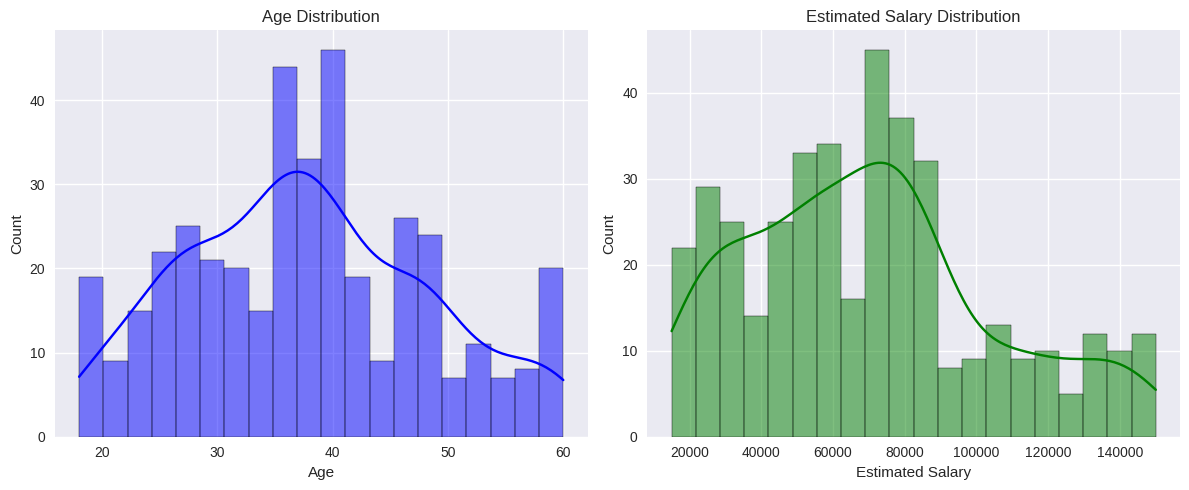

In [8]:
# Set up plotting style
plt.style.use('seaborn')

# Histogram for Age and EstimatedSalary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['EstimatedSalary'], bins=20, kde=True, color='green')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

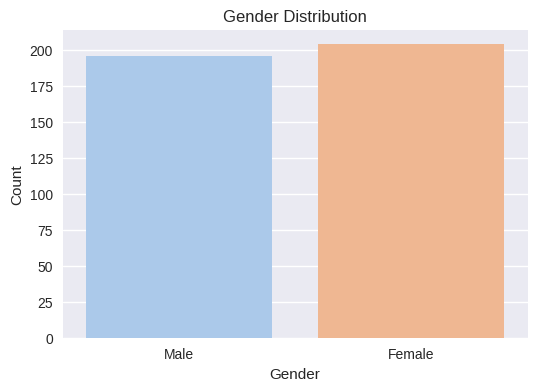

In [9]:
# Bar plots for gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

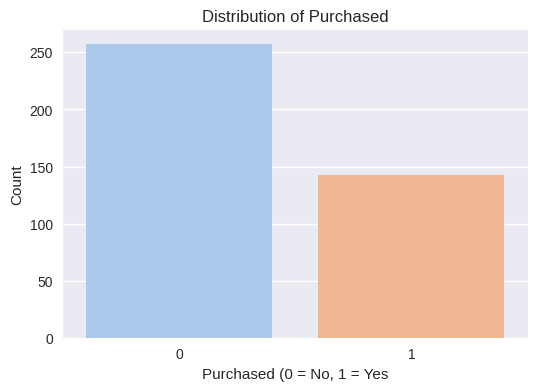

In [12]:
# Bar plot for Purchased distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df, palette='pastel')
plt.title('Distribution of Purchased')
plt.xlabel('Purchased (0 = No, 1 = Yes')
plt.ylabel('Count')
plt.show()

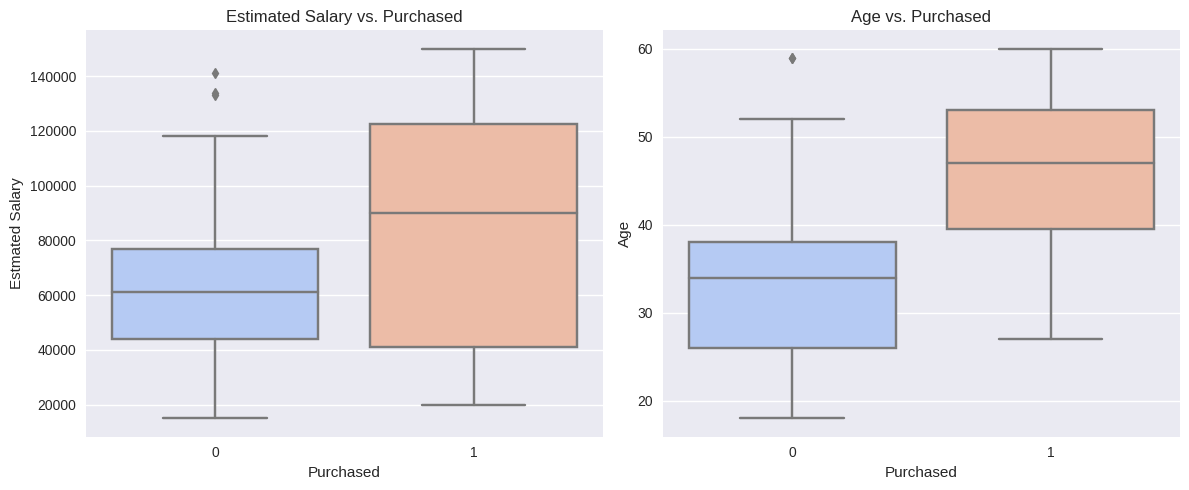

In [13]:
# Box plots of Age and EstimatedSalary by Purchased
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df, palette='coolwarm')
plt.title('Estimated Salary vs. Purchased')
plt.xlabel('Purchased')
plt.ylabel('Estmated Salary')

plt.subplot(1, 2, 2)
sns.boxplot(x='Purchased', y='Age', data=df, palette='coolwarm')
plt.title('Age vs. Purchased')
plt.xlabel('Purchased')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

In [14]:
# 5. Cross-Tabulation of Gender vs. Purchased
gender_purchased = pd.crosstab(df['Gender'], df['Purchased'], normalize='index')
print("Cross-Tabulation of Gender vs. Purchased (Proportions):")
print(gender_purchased)

Cross-Tabulation of Gender vs. Purchased (Proportions):
Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


<Figure size 600x400 with 0 Axes>

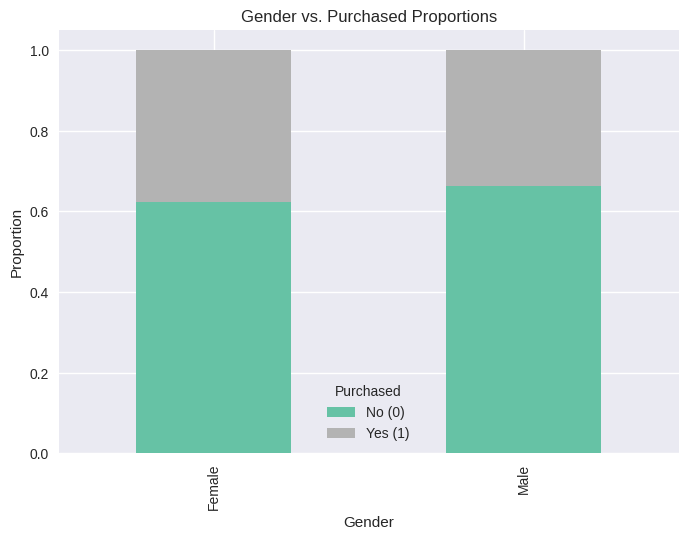

In [15]:
# Bar plot for Gender vs. Purchased
plt.figure(figsize=(6, 4))
gender_purchased.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Gender vs. Purchased Proportions')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Purchased', labels=['No (0)', 'Yes (1)'])
plt.show()

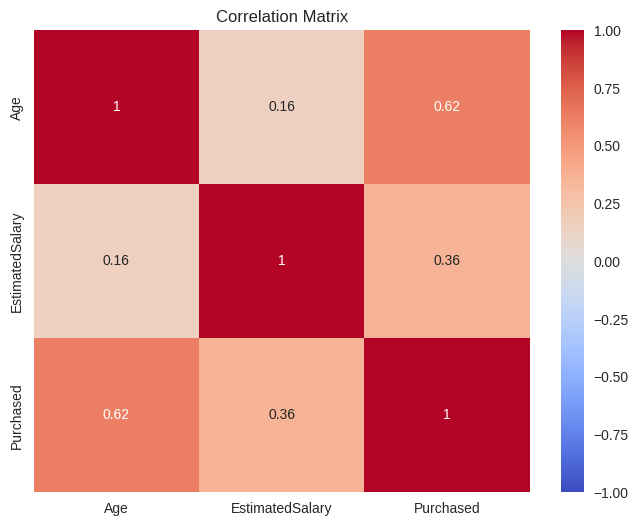

Correlation Matrix:
                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000


In [16]:
# Correlation Matrix (only numerical features)
# Drop User ID and Gender since they’re not numerical for correlation
numerical_df = df[['Age', 'EstimatedSalary', 'Purchased']]
corr_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Print correlation values for reference
print("Correlation Matrix:")
print(corr_matrix)

#### Overview of EDA

- **Gender:** Females slightly outnumber males (by <20), so the distribution is fairly balanced. No major concerns here.
- **Age:** Approximately normal distribution, which is good for Gaussian Naive Bayes (our likely choice for continuous features). The symmetry (mean ≈ median from df.describe()) aligns with this assumption.
- **EstimatedSalary:** Slightly right-skewed, meaning there are more customers with lower salaries, but a tail extends to higher values. This skewness isn’t extreme, so Gaussian Naive Bayes should still work, though we’ll standardize it to mitigate any impact.
- **Purchased (Target):** Twice as many 0s (no purchase) as 1s (purchase), confirming the class imbalance (64% no, 36% yes from df.describe()). This imbalance suggests we might prioritize metrics like precision, recall, or F1-score over accuracy.

**Relationships with Purchased**

- **Age vs. Purchased (Box Plot):** Both groups (0 and 1) have similar interquartile ranges (IQR), meaning the spread of ages is comparable. However, the Purchased=1 group has higher means and quartiles, suggesting older customers are more likely to buy. This aligns with the correlation (0.62, strong positive) between Age and Purchased.
- **EstimatedSalary vs. Purchased (Box Plot):** The Purchased=1 group has higher means and upper limits, indicating wealthier customers are more likely to buy. This is supported by the correlation (0.36, moderate positive) between EstimatedSalary and Purchased.
- **Gender vs. Purchased (Cross-Tabulation):** Proportions: Females (62.3% no, 37.7% yes), Males (66.3% no, 33.7% yes).
Both genders show similar patterns, with more non-purchases (0s) than purchases (1s). The slight difference (females slightly more likely to buy) suggests Gender might not be a strong predictor, but we’ll include it for completeness.

**Correlations**
- **Age ↔ Purchased (0.62):** Strong positive correlation—older customers are significantly more likely to buy.
EstimatedSalary ↔ Purchased (0.36): Moderate positive correlation—higher salaries are associated with purchases, but less strongly than age.
- **Age ↔ EstimatedSalary (0.16):** Weak positive correlation, meaning these features are mostly independent. This is good for Naive Bayes, as it assumes feature independence.
- **Insight:** Age and EstimatedSalary both influence Purchased, with Age being the stronger predictor. The weak correlation between Age and EstimatedSalary supports the Naive Bayes assumption.

**Key Takeaways**
- **Class Imbalance:** The 2:1 ratio of 0s to 1s means we’ll need to evaluate the model carefully, possibly using precision, recall, or F1-score.
- **Feature Importance:** Age is the strongest predictor, followed by EstimatedSalary. Gender seems less influential but worth including.
- **Feature Distributions:** Age is normal, EstimatedSalary is slightly skewed—both suitable for Gaussian Naive Bayes after standardization.
- **Independence:** Low correlation between Age and EstimatedSalary aligns with Naive Bayes’ assumptions.

## Data Preprocessing

Now that we understand the distribution of the data and the relationship between variables, we’re ready to preprocess the data for Naive Bayes. Here’s the plan:

1. **Drop User ID**. It’s a unique identifier with no predictive value.
2. **Encode Gender**. We need to convert Male/Female to numerical values (e.g., Male=0, Female=1) using label encoding, since it’s binary. Alternatively, one-hot encoding could work, but label encoding is simpler here.
3. **Standardize Numerical Features.** We will apply standard scaling (mean=0, std=1) to Age and EstimatedSalary. This aligns with Gaussian Naive Bayes’ assumption of normally distributed features.
4. **Train-Test Split**. Split the data into training (e.g., 80%) and testing (20%) sets to evaluate the model’s generalization.
5. **Model Choice**. Given the continuous features (Age, EstimatedSalary) and one categorical feature (Gender), we’ll use Gaussian Naive Bayes. It assumes numerical features follow a Gaussian distribution, which fits our data after standardization.

In [18]:
# 1. Drop User ID
df = df.drop('User ID', axis=1)

# 2. Encode Gender (Label Encoding)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# Male → 0, Female → 1 (check mapping with label_encoder.classes_)

# 3. Split Features (X) and Target (y)
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# 4. Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures the class imbalance is preserved in both sets

# 5. Standardize Numerical Features (Age and EstimatedSalary)
scaler = StandardScaler()
# Fit and transform on training data
X_train[['Age', 'EstimatedSalary']] = scaler.fit_transform(X_train[['Age', 'EstimatedSalary']])
# Transform test data (using the same scaler)
X_test[['Age', 'EstimatedSalary']] = scaler.transform(X_test[['Age', 'EstimatedSalary']])

# Check the transformed data
print("First 5 rows of X_train (after preprocessing):")
print(X_train.head())
print("\nFirst 5 rows of X_test (after preprocessing):")
print(X_test.head())
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

First 5 rows of X_train (after preprocessing):
     Gender       Age  EstimatedSalary
65        1 -1.234462        -0.367992
179       0 -0.577646        -1.058314
109       0  0.079170         0.264803
379       0  1.955786        -1.374712
325       0  0.360662        -0.310465

First 5 rows of X_test (after preprocessing):
     Gender       Age  EstimatedSalary
331       0  1.017478         1.386577
92        1 -1.046800        -1.604819
1         1 -0.202323        -1.461002
234       0  0.079170         1.185233
136       0 -1.609785         0.322330

Class distribution in y_train:
Purchased
0    0.64375
1    0.35625
Name: proportion, dtype: float64

Class distribution in y_test:
Purchased
0    0.6375
1    0.3625
Name: proportion, dtype: float64


#### **Notes on Preprocessing**

- X_train and X_test now contain Gender (encoded as 0/1), and standardized Age and EstimatedSalary (mean=0, std=1).
- The first 5 rows show Gender as integers (0=Male, 1=Female, based on typical LabelEncoder behavior), and Age/EstimatedSalary as scaled values (e.g., -1.23, 0.36), confirming the transformation worked.
- Training set: 320 samples (80% of 400).
- Test set: 80 samples (20% of 400).
- Class distribution is preserved due to stratify=y:
    - y_train: 64.375% (0), 35.625% (1) — close to the overall 64.25%/35.75%.
    - y_test: 63.75% (0), 36.25% (1) — nearly identical.
- This balance ensures our evaluation will reflect the real dataset.
- Age and EstimatedSalary are now standardized, which aligns with Gaussian Naive Bayes’ assumption of normally distributed features. The values (e.g., -1.23, 1.95) look reasonable for a standard normal distribution.

## Gaussian Naive Bayes

The most suitable algorithm to implement here is the Gaussian Naive Bayes since Age and EstimatedSalary are continuous (and standardized), and Gender is binary. It assumes that numerical features follow a Gaussian distribution, which matches our preprocessed data. We will implement the model in three steps:
1. Train the model on X_train and y_train.
2. Predict on X_test.
3. Evaluate performance with accuracy, precision, recall, F1-score, and a confusion matrix, given the class imbalance.

In [20]:
# 1. Initialize and Train the Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 2. Make Predictions
y_pred = gnb.predict(X_test)

# 3. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Performance Metrics:
Accuracy: 0.8750
Precision: 0.8519
Recall: 0.7931
F1-Score: 0.8214


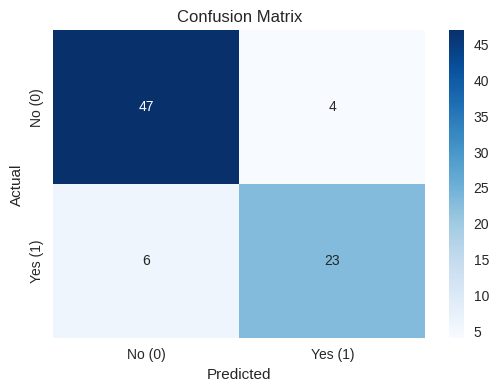

In [21]:
# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No (0)', 'Yes (1)'], yticklabels=['No (0)', 'Yes (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# 5. Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)']))


Classification Report:
              precision    recall  f1-score   support

      No (0)       0.89      0.92      0.90        51
     Yes (1)       0.85      0.79      0.82        29

    accuracy                           0.88        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.88      0.87        80



#### **Analysis of Model Performance Metrics**
- **Accuracy: 0.8750 (87.5%):** The model correctly predicted 87.5% of the test cases (70 out of 80). This is well above the baseline of 63.75% (predicting all 0s due to class imbalance), showing the model learned meaningful patterns.
- **Precision (Yes): 0.8519 (85.19%):** Of the instances predicted as purchases (1), 85.19% were correct. This is strong, meaning false positives are low.
- **Recall (Yes): 0.7931 (79.31%):** The model identified 79.31% of actual purchases. This is solid but indicates some missed positives (false negatives).
- **F1-Score (Yes): 0.8214 (82.14%):** The harmonic mean of precision and recall balances the trade-off. An F1 of 0.82 is good, especially given the imbalance.
- **Confusion Matrix:**
    - **True Negatives (TN):** 47 — Correctly predicted 47 non-purchases (0).
    - **False Positives (FP):** 4 — Incorrectly predicted 4 non-purchases as purchases.
    - **False Negatives (FN):** 6 — Missed 6 actual purchases, predicting them as non-purchases.
    - **True Positives (TP):** 23 — Correctly predicted 23 purchases.
    - **Breakdown:** Total test samples: 80 (47 + 4 + 6 + 23 = 51 no, 29 yes, matching y_test distribution: 63.75% no, 36.25% yes). Errors: 10 (4 FP + 6 FN), hence accuracy = (47 + 23) / 80 = 87.5%.
- **Classification Report:**
    - *No (0):*
        - Precision: 0.89 — High, as expected with more 0s in the data.
        - Recall: 0.92 — Very good at catching non-purchases.
        - F1: 0.90 — Excellent balance.
    - *Yes (1):*
        - Precision: 0.85, Recall: 0.79, F1: 0.82 — Slightly lower than 0s due to fewer 1s, but still strong.
- **Key Takeaways:**
    - The model performs well on both classes, despite the 2:1 imbalance. It’s not overly biased toward the majority class (0), as evidenced by the decent recall for 1 (79.31%).
    - Age (corr=0.62) and EstimatedSalary (corr=0.36) likely drove the performance, with Gender playing a smaller role (similar purchase proportions for Male/Female).
    - Errors (10/80) are balanced: 4 FP (over-predicting purchases) and 6 FN (missing purchases). This suggests the model isn’t overly conservative or aggressive.
    
- **Recommendations:**

Here are a few recommendations that might improve model performance
    - **Feature Engineering:** Add interaction terms (e.g., Age * EstimatedSalary) and test with a different model.
    - **Handle Imbalance:** Use oversampling (SMOTE) or class weights to boost recall for 1.
    - **Hyperparameter Tuning:** Gaussian Naive Bayes has a smoothing parameter (var_smoothing) we could adjust.
    - **Compare Models:** Try logistic regression or a tree-based model as a benchmark.

## Final Thoughts

This project was a great way to learn/practice the process of implementing a Gaussin Naive Bayes model for classification. Along the way, we managed to demonstrate the techniques used in every machine learning step. We began with the data cleaning process where we did not find any missing or duplicated values. The Exploratory Data Analysis section uncovered that Age and EstimatedSalary correlate with Purchased, with Age being the strongest predictor. The data showed class imbalance and mostly independent features. The next step in our pipeline was data preprocessing where we dropped User ID, encoded Gender, standardized Age and EstimatedSalary, and split the data into training and testing sets. This led us to
modeling. Here we applied a Gaussian Naive Bayes algorithm on our preprocessed dataset, achieving an accuracy of 87.5%, with balanced precision (0.85) and recall (0.79) for the minority class. Upon evaluation, we confirmed the model outperforms a baseline (63.75%) and handles imbalance reasonably well.